In [1]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearnex import patch_sklearn
import warnings
warnings.filterwarnings("ignore")
patch_sklearn()
#from sklearnex import patch_sklearn
#patch_sklearn(global_patch=True)
#import sklearn

#load data sets
books=pd.read_csv('Books.csv') 
users=pd.read_csv('Users.csv')
ratings=pd.read_csv('Ratings.csv')

print("Books Data : ", books.shape)
print("Users Data : ",users.shape)
print("Ratings Data :",ratings.shape)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Books Data :  (271360, 8)
Users Data :  (278858, 3)
Ratings Data : (1149780, 3)


In [2]:
#renaming columns
books.rename(columns={'Book-Title':'Title',
                      'Book-Author':'Author',
                      'Year-Of-Publication':'YOP'
                       },inplace=True)
#checking for null values
books.isnull().sum()

ISBN           0
Title          0
Author         1
YOP            0
Publisher      2
Image-URL-S    0
Image-URL-M    0
Image-URL-L    3
dtype: int64

In [3]:
books.loc[books['Author'].isnull(),:]
books.at[187689,'Author']='Other'
books.loc[books['Publisher'].isnull(),:]
books.at[128890,'Publisher']='Other'
books.at[129037,'Publisher']='Other'

In [4]:
#checking column Year of Publication
books['YOP'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [5]:
books[books['YOP']=='DK Publishing Inc']
books.at[209538,'YOP']=2000
books.at[221678,'YOP']=2000
books.at[209538,'Author']='DK Publishing Inc'
books.at[221678,'Author']='DK Publishing Inc'
books[books['YOP']=='Gallimard']
books.at[220731,'YOP']=2003
books.at[220731,'Author']='Gallimard'
books['YOP'].unique()
books.loc[books['Author'] == 'Gallimard',:]
books.loc[books['Author'] == 'DK Publishing Inc',:]
books['YOP'] = books['YOP'].astype(int)

In [6]:
print(sorted(list(books['YOP'].unique())))
books.drop_duplicates(keep='last', inplace=True) 
books.reset_index(drop = True, inplace = True)

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


In [7]:
print("Columns: ", list(users.columns))
users.head()
users.isnull().sum()
print(users.isna().sum()) 
 
print(sorted(list(users['Age'].unique())))
users.describe()

Columns:  ['User-ID', 'Location', 'Age']
User-ID          0
Location         0
Age         110762
dtype: int64
[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0,

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [8]:
required = users[users['Age'] <= 80]
required = required[required['Age'] >= 10]

users.loc[users['Age'] > 80, 'Age'] = 80    #outliers with age grater than 80 are substituted with mean 
users.loc[users['Age'] < 10, 'Age'] = 80    #outliers with age less than 10 years are substitued with mean
users['Age'] = users['Age'].fillna(80)      #filling null values with mean
users['Age'] = users['Age'].astype(int)     #changing datatype to int

print(sorted(list(users['Age'].unique())))
## Drop duplicate rows
users.drop_duplicates(keep='last', inplace=True)
users.reset_index(drop=True, inplace=True)

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]


Columns:  ['User-ID', 'Location', 'Age']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


<Axes: xlabel='Book-Rating', ylabel='count'>

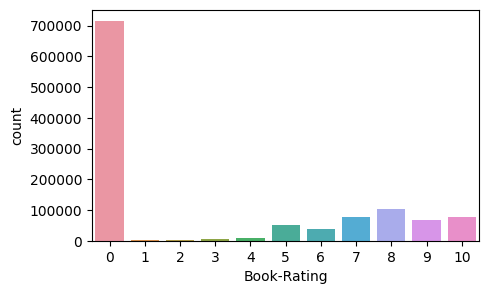

In [9]:
print("Columns: ", list(users.columns))
ratings.head()
ratings.isnull().sum() 
## Drop duplicate rows
ratings.drop_duplicates(keep='last', inplace=True)
ratings.reset_index(drop=True, inplace=True)
ratings.info()
plt.figure(figsize=(5,3))
sns.countplot(x="Book-Rating", data=ratings)

In [10]:
ratings_with_name = ratings.merge(books,on='ISBN')

In [11]:
num_rating_df = ratings_with_name.groupby('Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_rating_df

,Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [12]:
avg_rating_df = ratings_with_name.groupby('Title').mean()['Book-Rating'].reset_index()
avg_rating_df.rename(columns={'Book-Rating':'avg_rating'},inplace=True)
avg_rating_df

,Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [13]:
popular_df = num_rating_df.merge(avg_rating_df,on='Title')
popular_df

,Title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [14]:
popular_df = popular_df[popular_df['num_ratings']>=250].sort_values('avg_rating',ascending=False).head(50)


In [15]:
popular_df = popular_df.merge(books,on='Title').drop_duplicates('Title')[['Title','Author','Image-URL-M','num_ratings','avg_rating']]


In [16]:
popular_df['Image-URL-M'][0]


'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'

In [17]:
ratings_with_name = ratings.merge(books,on='ISBN')
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 200
padhe_likhe_users = x[x].index
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(padhe_likhe_users)]
y = filtered_rating.groupby('Title').count()['Book-Rating']>=50
famous_books = y[y].index
final_ratings = filtered_rating[filtered_rating['Title'].isin(famous_books)]
pt = final_ratings.pivot_table(index='Title',columns='User-ID',values='Book-Rating')
pt.fillna(0,inplace=True)

In [18]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_scores = cosine_similarity(pt)
def recommend(book_name):
    # index fetch
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:6]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Title')['Title'].values))
        #item.extend(list(temp_df.drop_duplicates('Title')['Author'].values))
        #item.extend(list(temp_df.drop_duplicates('Title')['Image-URL-M'].values))
        
        data.append(item)
    
    return data

In [20]:
recommend('Harry Potter and the Chamber of Secrets (Book 2)') 

#Midnight
#Animal Farm
#Fine Things
#The Notebook


[['Harry Potter and the Prisoner of Azkaban (Book 3)'],
 ['Harry Potter and the Goblet of Fire (Book 4)'],
 ["Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))"],
 ["Harry Potter and the Sorcerer's Stone (Book 1)"],
 ['Harry Potter and the Order of the Phoenix (Book 5)']]

In [21]:
import pickle
pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))
pickle.dump(popular_df,open('popular.pkl','wb'))


In [22]:
pickle.dump(pt,open('pt.pkl','wb'))
pickle.dump(books,open('books.pkl','wb'))